In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Histogram equalization demo

In [3]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/1.jpg

File ‘1.jpg’ already there; not retrieving.



<class 'numpy.ndarray'>
(678, 1024)


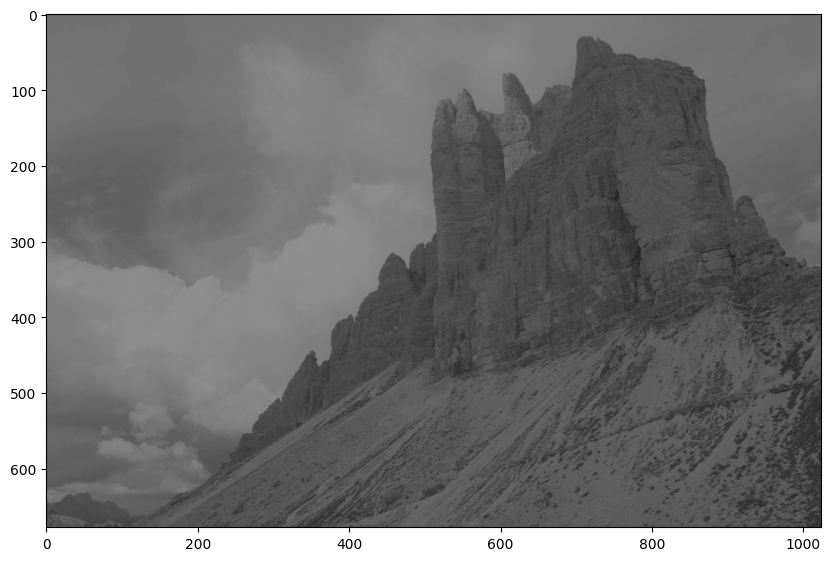

In [4]:
I = cv.imread("1.jpg", cv.IMREAD_GRAYSCALE)
print( type(I))
print( I.shape )

plt.figure( figsize=(10,10))
plt.imshow( I, cmap="gray", vmin=0, vmax=255 )

Image Histogram h(r_k) = n_k
Where r_k is the k_th intensity value and n_k is the number of pixels in the image with intensity r_k

Usually it is normalized by the total number of pixels -> I.shape[0]*I.shape[1]
So each component is an estimate of the probability of the occurrence of the intensity r_k

Image histogram: 
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1     1     2     1     8     3    11
     8    21    22    24    28    48    61    95   116   183   229   329
   511   700   942  1132  1330  1510  1676  1836  1978  2085  2457  2640
  2930  3237  3603  4134  4540  5071  5611  6416  6876  7928  8814  9732
 10398 11168 11696 11766 11860 12001 11708 11402 11232 10520  9587  9042
  8705  8210  7984  8047  8009  8464  8930  9430 10157 10742 10851 10974
 10798 10338 10352  8168  8651  5909  4571  4563  4400  4289  3934  5710
  6304  5474  5000  6106  6629  7395 13939 23669 15051  8890  6041  4970
  3855  4734  8004  6655  7838  6681  6891 10528  8994  9407  9944  7974
 10790  8215  9041  8538  8286  3621  4982  7256  9498  8216  1405     5
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0   

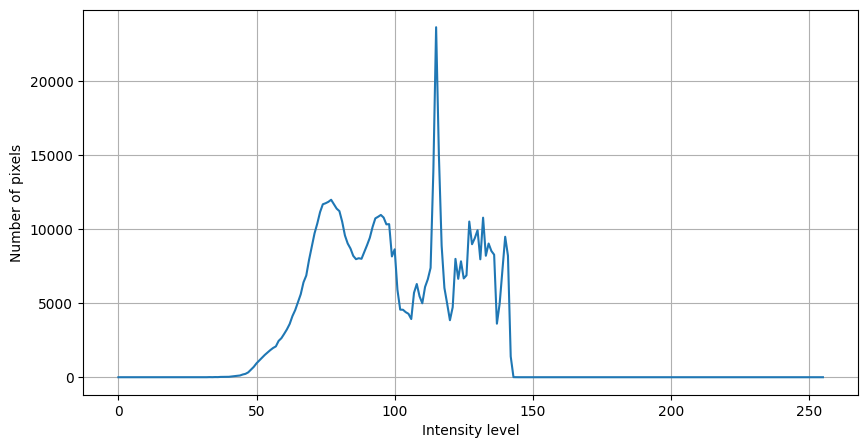

In [5]:
# manually compute the image histogram
H = np.zeros( 256, dtype=np.uint32 ) # grey color

for y in range( I.shape[0]):
    for x in range(I.shape[1]):
        H[ I[y,x] ] += 1 # I increment every scale of grey color
		# row, col
    
print("Image histogram: ")
print(H)

plt.figure( figsize=(10,5))
plt.plot( H )
plt.xlabel("Intensity level")
plt.ylabel("Number of pixels")
plt.grid(True)

When enhancing (potenziando) an image ideally we would like to maximize the intensity range of the uiamge to catch both the dark and bright details
Mapping function s = T(r)
So that the resulting histogram of s is flat uniform distribution

In [6]:
# Compute the equalization function T

T = np.zeros( 256, dtype=np.uint32 )

for ii in range( 256 ):
    T[ii] = np.sum( H[:ii+1] ) * 255 / ( I.shape[0]*I.shape[1])
    
print("T(r) = ")
print(T)

T(r) = 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   2   2
   3   3   4   5   6   7   8   9  10  12  14  15  18  20  22  25  29  32
  36  40  44  49  53  57  62  66  70  74  77  81  84  87  90  93  96  99
 102 106 109 113 117 121 125 129 133 136 139 141 143 145 146 148 149 151
 154 156 158 160 162 165 170 179 184 188 190 192 193 195 198 200 203 205
 208 212 215 219 222 225 229 232 235 239 242 243 245 247 251 254 254 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 25

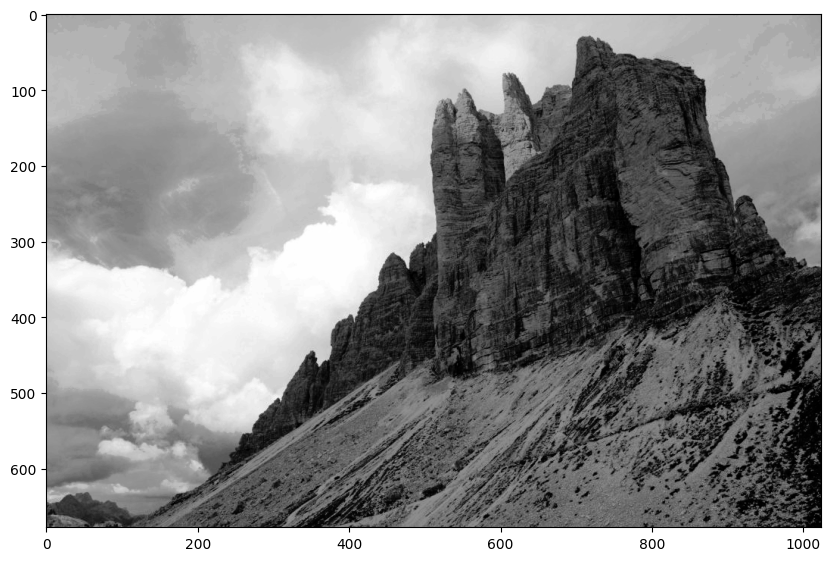

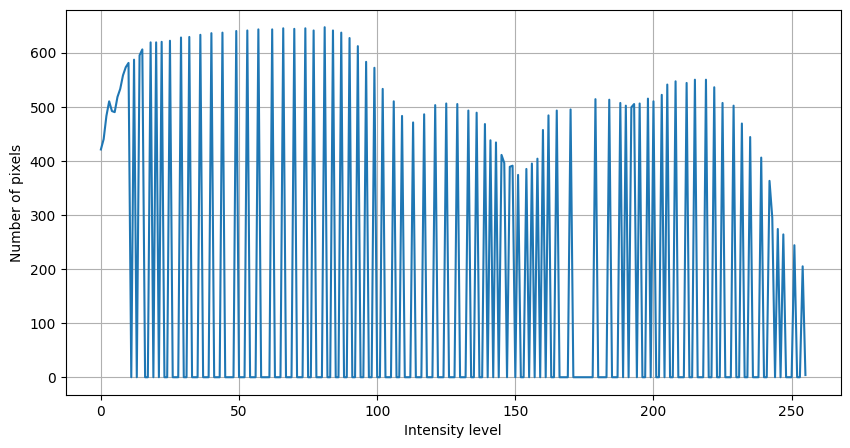

In [7]:
# Apply T to the original image

I_eq = np.zeros_like( I )

for y in range( I.shape[0]):
    for x in range(I.shape[1]):
        I_eq[y,x] = T[ I[y,x] ] #assign the T of position of the real pixel value

plt.figure( figsize=(10,10))
plt.imshow( I_eq, cmap="gray", vmin=0, vmax=255 )


H_eq = np.zeros( 256, dtype=np.uint32 )
for p in I_eq:
    H_eq[p] += 1
    

plt.figure( figsize=(10,5))
plt.plot( H_eq )
plt.xlabel("Intensity level")
plt.ylabel("Number of pixels")
plt.grid(True)

# Histogram matching demo

In [8]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/2.jpg

File ‘2.jpg’ already there; not retrieving.



In [9]:
I1 = cv.imread( "1.jpg", cv.IMREAD_GRAYSCALE)
I2 = cv.imread( "2.jpg", cv.IMREAD_GRAYSCALE)

Compute normalized [histograms](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a)

In [10]:
hist1 = cv.calcHist([I1],[0],None,[256],[0,256])/np.prod(I1.shape) # same thing that we have done previouslly but with a command
hist2 = cv.calcHist([I2],[0],None,[256],[0,256])/np.prod(I2.shape)

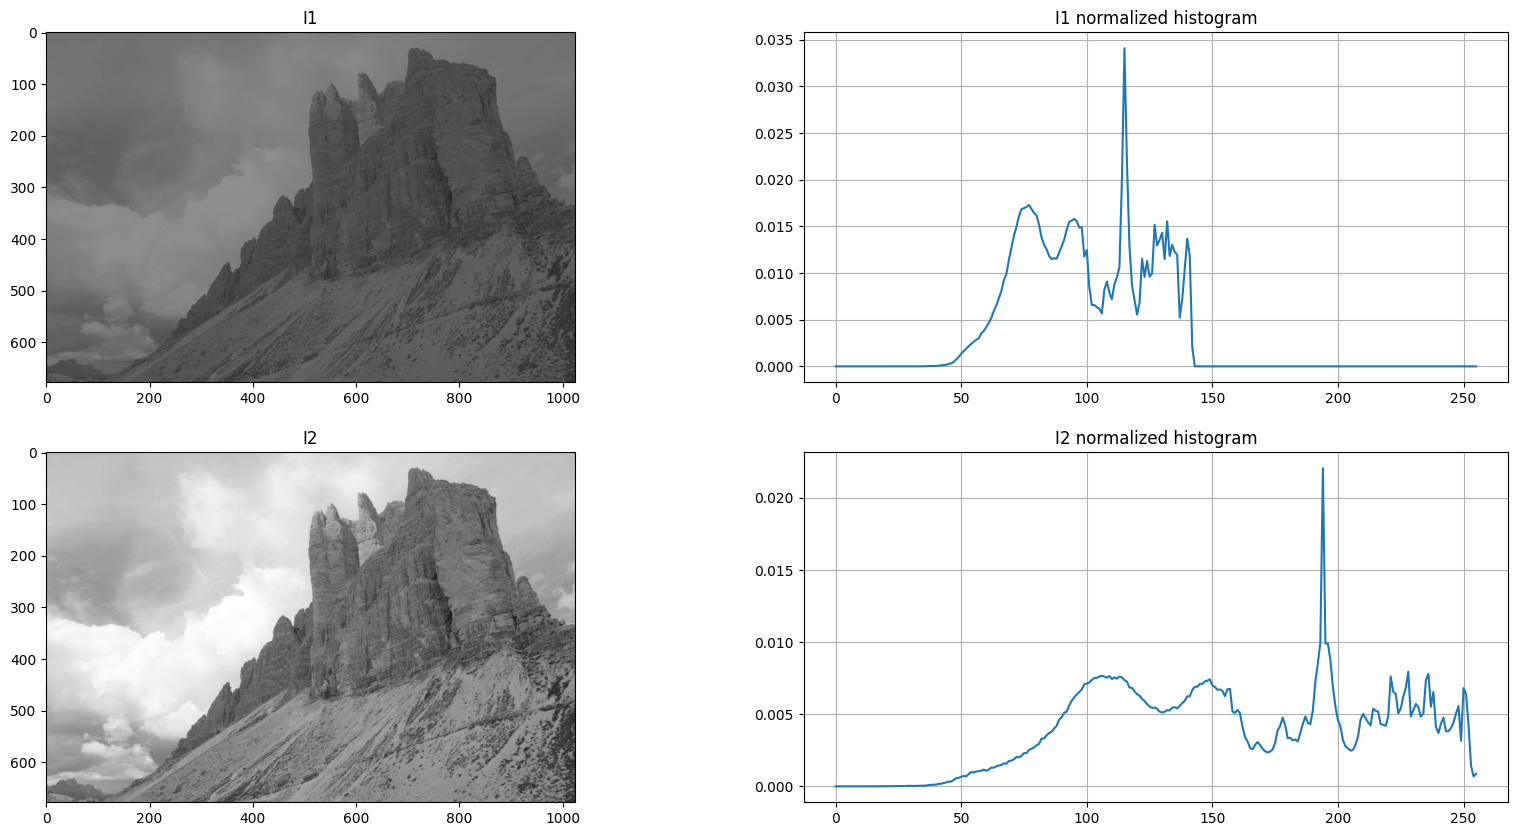

In [11]:
plt.figure( figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(I1, cmap="gray", vmin=0, vmax=255)
plt.title("I1")
plt.subplot(2,2,2)
plt.title("I1 normalized histogram")
plt.plot(hist1)
plt.grid(True)
plt.subplot(2,2,3)
plt.imshow(I2, cmap="gray",vmin=0, vmax=255)
plt.title("I2")
plt.subplot(2,2,4)
plt.title("I2 normalized histogram")
plt.plot(hist2)
plt.grid(True)

Compute the CDF

In [12]:
cdf1 = np.cumsum(hist1)
cdf2 = np.cumsum(hist2)

In [28]:
cdf1, cdf2

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.44035767e-06, 2.88071534e-06, 5.76143068e-06,
        7.20178835e-06, 1.87246497e-05, 2.30457227e-05, 3.88896571e-05,
        5.04125184e-05, 8.06600295e-05, 1.12347898e-04, 1.46916482e-04,
        1.87246497e-04, 2.56383665e-04, 3.44245483e-04, 4.81079462e-04,
        6.48160951e-04, 9.11746405e-04, 1.24158831e-03, 1.71546598e-03,
        2.45148875e-03, 3.45973912e-03, 4.81655605e-03, 6.44704093e-03,
        8.36271663e-03, 1.05376567e-02, 1.29516962e-02, 1.559619

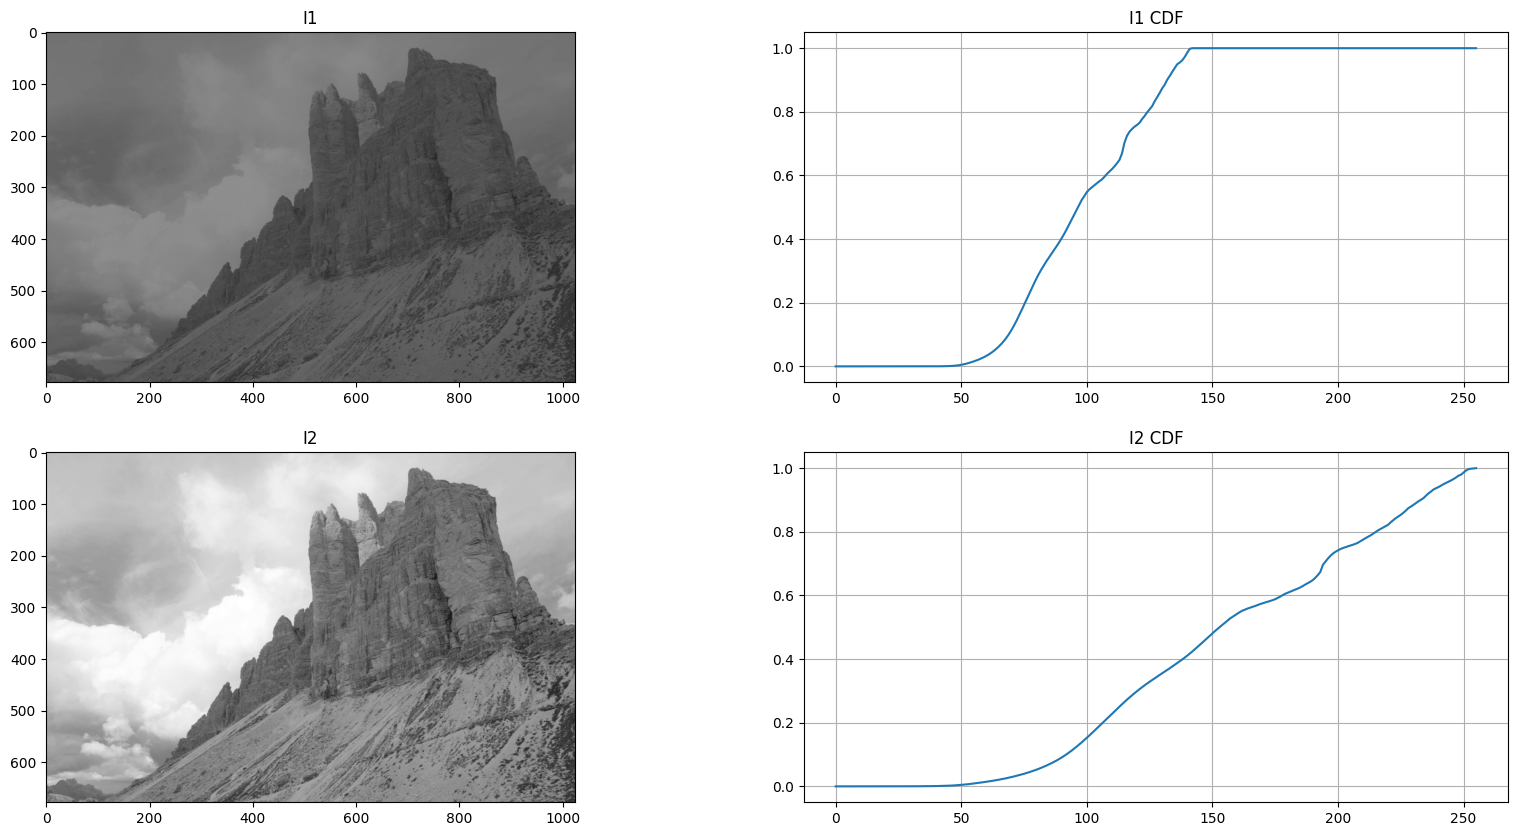

In [13]:
plt.figure( figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(I1, cmap="gray", vmin=0, vmax=255)
plt.title("I1")
plt.subplot(2,2,2)
plt.title("I1 CDF")
plt.plot(cdf1)
plt.grid(True)
plt.subplot(2,2,3)
plt.imshow(I2, cmap="gray",vmin=0, vmax=255)
plt.title("I2")
plt.subplot(2,2,4)
plt.title("I2 CDF")
plt.plot(cdf2)
plt.grid(True)

Equalize image 1

In [22]:
CDF1_LUT = (cdf1*255).astype(np.uint8)
I1_eq = CDF1_LUT[I1]

In [26]:
cdf1, CDF1_LUT

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.44035767e-06, 2.88071534e-06, 5.76143068e-06,
        7.20178835e-06, 1.87246497e-05, 2.30457227e-05, 3.88896571e-05,
        5.04125184e-05, 8.06600295e-05, 1.12347898e-04, 1.46916482e-04,
        1.87246497e-04, 2.56383665e-04, 3.44245483e-04, 4.81079462e-04,
        6.48160951e-04, 9.11746405e-04, 1.24158831e-03, 1.71546598e-03,
        2.45148875e-03, 3.45973912e-03, 4.81655605e-03, 6.44704093e-03,
        8.36271663e-03, 1.05376567e-02, 1.29516962e-02, 1.559619

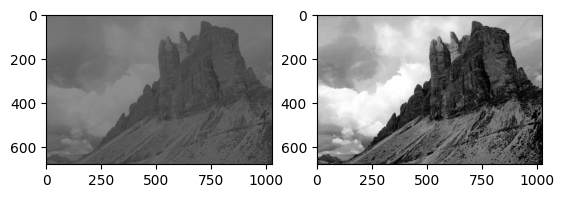

In [14]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(I1, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(I1_eq, cmap="gray", vmin=0, vmax=255)

Equalize image 2

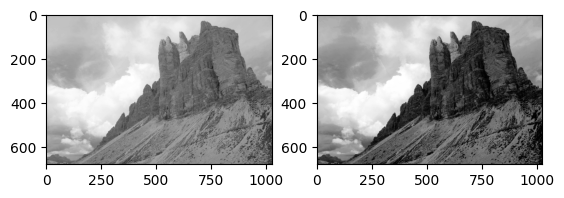

In [15]:
CDF2_LUT = (cdf2*255).astype(np.uint8)
I2_eq = CDF2_LUT[I2]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(I2, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(I2_eq, cmap="gray", vmin=0, vmax=255)

The two equalized images look like the same

Compute ```G```, as the function mapping I2 to I2_equalized

Text(0, 0.5, 'G_out')

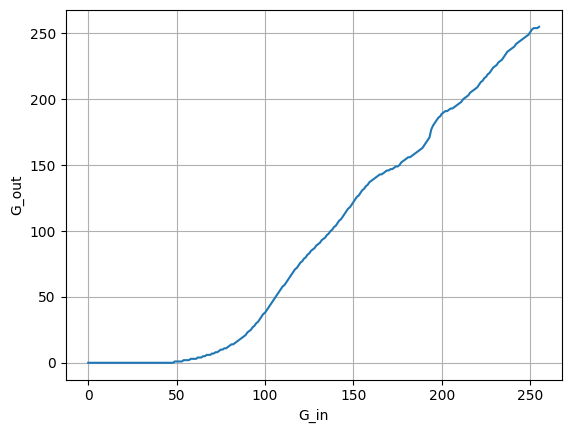

In [16]:
G_in = np.arange(256)
G_out = CDF2_LUT
#print( np.concatenate( [np.expand_dims(G_in, axis=1), np.expand_dims(G_out, axis=1)], axis=1))
plt.figure()
plt.plot( G_in, G_out)
plt.grid(True)
plt.xlabel("G_in")
plt.ylabel("G_out")

Invert G to map from equalized I2 to I2 
note: the inversion may not be exact since G is not always strictly monotonic

Text(0.5, 0, 'G_out')

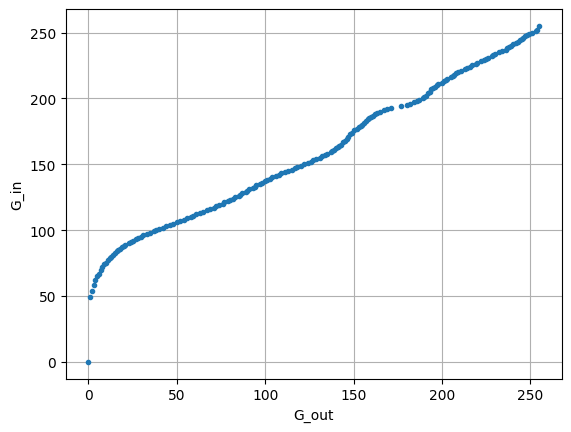

In [17]:
uniq_vals, uniq_indices,uniq_inverse = np.unique(G_out, return_index=True, return_inverse=True ) # <- Here is where we let the function be monotonic

Ginv_in = G_out[uniq_indices]
Ginv_out = G_in[uniq_indices]

# Now G is inverted but can contain missing values
#print( np.concatenate( [np.expand_dims(Ginv_in, axis=1), np.expand_dims(Ginv_out, axis=1)], axis=1))
plt.figure()
plt.plot( Ginv_in, Ginv_out, '.')
plt.grid(True)
plt.ylabel("G_in")
plt.xlabel("G_out")

Interpolate missing values

In [18]:
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable


Text(0.5, 0, 'G_out')

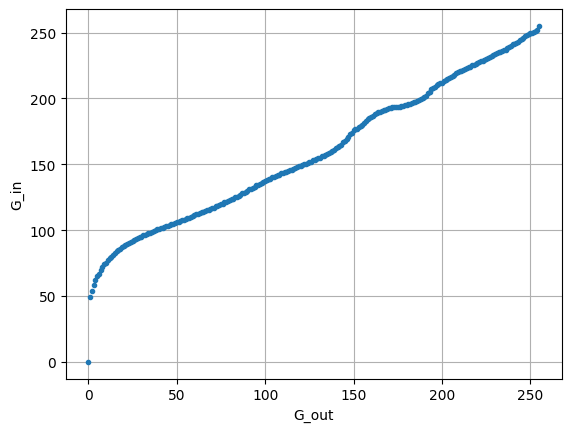

In [19]:
import scipy.interpolate

interpolator = scipy.interpolate.interp1d( Ginv_in, Ginv_out, kind="linear")

Ginv_in = np.arange(256)
Ginv_out = interpolator( Ginv_in )

plt.figure()
plt.plot( Ginv_in, Ginv_out,'.')
plt.grid(True)
plt.ylabel("G_in")
plt.xlabel("G_out")

Apply Ginv to the equalized I1

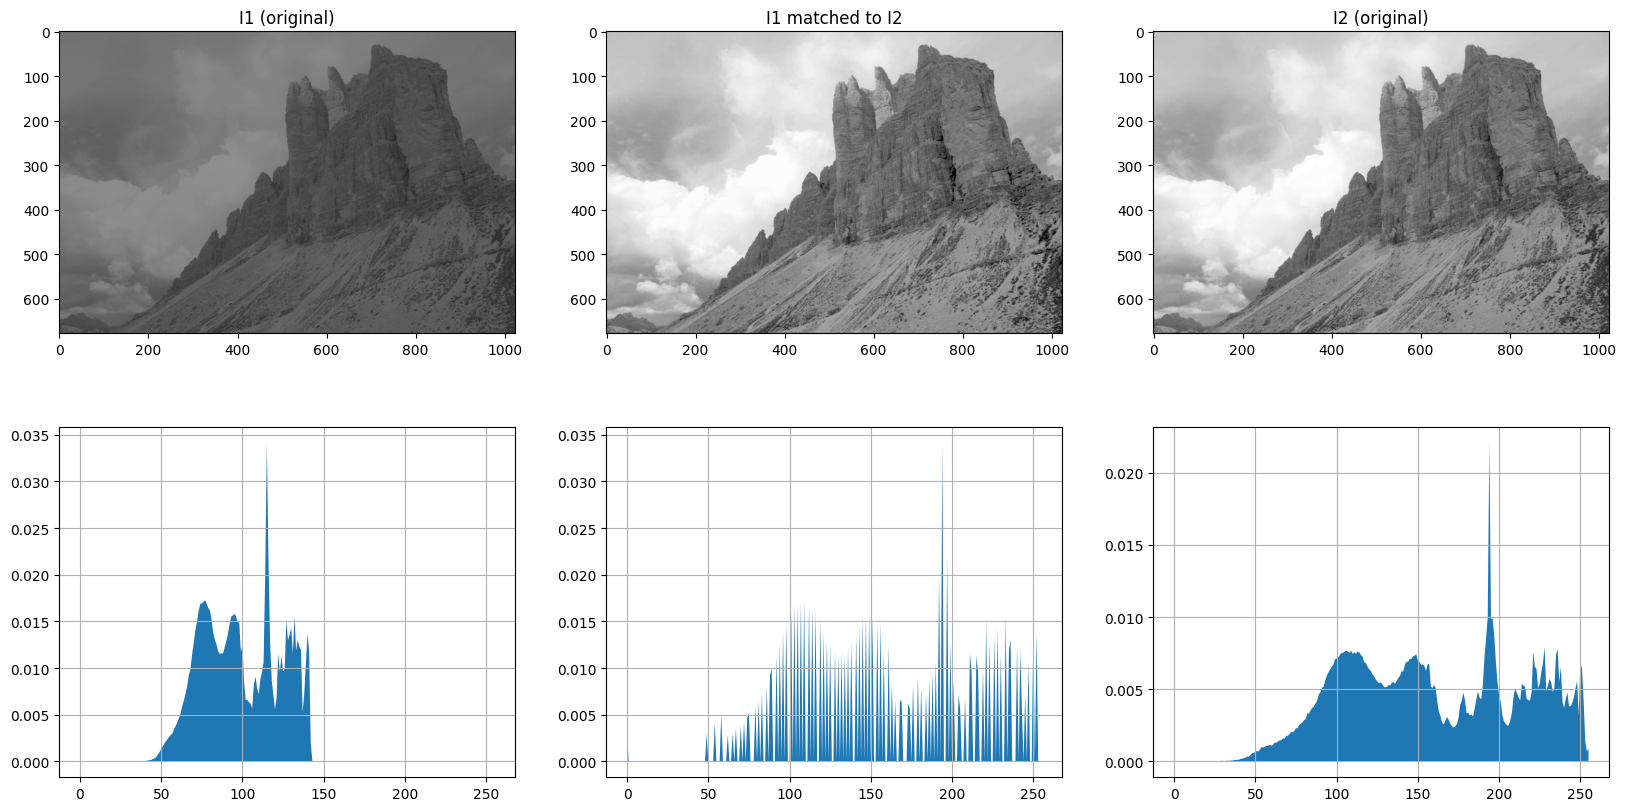

In [20]:
I1_to_I2 = Ginv_out[I1_eq].astype(np.uint8)
I1_to_I2_hist = cv.calcHist([I1_to_I2],[0],None,[256],[0,256])/np.prod(I1_to_I2.shape)

plt.figure( figsize=(20,10) )
plt.subplot(2,3,1)
plt.imshow(I1, cmap="gray", vmin=0, vmax=255)
plt.title("I1 (original)")
plt.subplot(2,3,2)
plt.imshow(I1_to_I2, cmap="gray", vmin=0, vmax=255)
plt.title("I1 matched to I2")
plt.subplot(2,3,3)
plt.imshow(I2, cmap="gray", vmin=0, vmax=255)
plt.title("I2 (original)")
plt.subplot(2,3,4)
plt.fill_between(np.arange(256),np.squeeze(hist1))
plt.grid(True)
plt.subplot(2,3,5)
plt.fill_between(np.arange(256),np.squeeze(I1_to_I2_hist))
plt.grid(True)
plt.subplot(2,3,6)
plt.fill_between(np.arange(256),np.squeeze(hist2))
plt.grid(True)

The last two graph are similar in some sense

In [21]:
!rm 1.jpg 2.jpg